In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

F:\New Guava Model\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
F:\New Guava Model\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
F:\New Guava Model\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Splitted/train'
valid_path = 'Splitted/val'


In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inception.layers:
    layer.trainable = False

folders = glob('Splitted/train/*')

x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [5]:
model1 = Model(inputs=inception.input, outputs=prediction)

In [6]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [7]:
model_layers = [ layer.name for layer in model1.layers]
print('layer name : ',model_layers)

layer name :  ['input_1', 'conv2d', 'batch_normalization', 'activation', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'conv2d_2', 'batch_normalization_2', 'activation_2', 'max_pooling2d', 'conv2d_3', 'batch_normalization_3', 'activation_3', 'conv2d_4', 'batch_normalization_4', 'activation_4', 'max_pooling2d_1', 'conv2d_8', 'batch_normalization_8', 'activation_8', 'conv2d_6', 'conv2d_9', 'batch_normalization_6', 'batch_normalization_9', 'activation_6', 'activation_9', 'average_pooling2d', 'conv2d_5', 'conv2d_7', 'conv2d_10', 'conv2d_11', 'batch_normalization_5', 'batch_normalization_7', 'batch_normalization_10', 'batch_normalization_11', 'activation_5', 'activation_7', 'activation_10', 'activation_11', 'mixed0', 'conv2d_15', 'batch_normalization_15', 'activation_15', 'conv2d_13', 'conv2d_16', 'batch_normalization_13', 'batch_normalization_16', 'activation_13', 'activation_16', 'average_pooling2d_1', 'conv2d_12', 'conv2d_14', 'conv2d_17', 'conv2d_18', 'batch_normalization_12', 'b

In [8]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Splitted/train',target_size = (224, 224),batch_size = 16,class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('Splitted/test',target_size = (224, 224), batch_size = 16,class_mode = 'categorical')

a = model1.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=11,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 1377 images belonging to 5 classes.
Found 465 images belonging to 5 classes.


F:\New Guava Model\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/11
87/87 [==============================] - 376s 4s/step - loss: 3.2332 - accuracy: 0.7168 - val_loss: 1.7660 - val_accuracy: 0.8129

In [10]:
Inres = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
for layer in Inres.layers:
    layer.trainable = False

folders = glob('Splitted/train/*')

x = Flatten()(Inres.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
model2 = Model(inputs=Inres.input, outputs=prediction)

In [13]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [14]:
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Splitted/train',target_size = (224, 224),batch_size = 16,class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('Splitted/test',target_size = (224, 224), batch_size = 16,class_mode = 'categorical')

b = model2.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=11,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 1377 images belonging to 5 classes.
Found 465 images belonging to 5 classes.
Epoch 1/11
87/87 [==============================] - 358s 4s/step - loss: 4.6969 - accuracy: 0.6580 - val_loss: 4.3841 - val_accuracy: 0.7183

In [16]:
res50=ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [17]:
for layer in res50.layers:
    layer.trainable = False

folders = glob('Splitted/train/*')

x = Flatten()(res50.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [18]:
model3 = Model(inputs=res50.input, outputs=prediction)

In [19]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [20]:
model3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Splitted/train',target_size = (224, 224),batch_size = 16,class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('Splitted/test',target_size = (224, 224), batch_size = 16,class_mode = 'categorical')

c = model3.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=11,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 1377 images belonging to 5 classes.
Found 465 images belonging to 5 classes.
Epoch 1/11
87/87 [==============================] - 317s 4s/step - loss: 2.5871 - accuracy: 0.5142 - val_loss: 1.4405 - val_accuracy: 0.3419

In [22]:
vgg19=VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [23]:
for layer in vgg19.layers:
    layer.trainable = False

folders = glob('Splitted/train/*')

x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [24]:
model4 = Model(inputs=vgg19.input, outputs=prediction)

In [25]:
model4.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [26]:
model4.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Splitted/train',target_size = (224, 224),batch_size = 16,class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('Splitted/test',target_size = (224, 224), batch_size = 16,class_mode = 'categorical')

d = model4.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=11,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 1377 images belonging to 5 classes.
Found 465 images belonging to 5 classes.
Epoch 1/11
87/87 [==============================] - 546s 6s/step - loss: 1.2214 - accuracy: 0.6275 - val_loss: 0.7763 - val_accuracy: 0.7290

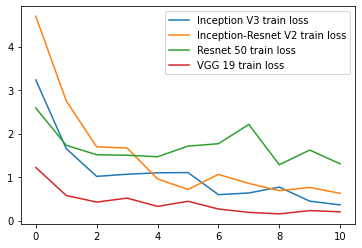

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

plt.plot(a.history['loss'], label='Inception V3 train loss')
plt.plot(b.history['loss'], label='Inception-Resnet V2 train loss')
plt.plot(c.history['loss'], label='Resnet 50 train loss')
plt.plot(d.history['loss'], label='VGG 19 train loss')
plt.legend()
plt.show()
plt.savefig('train_loss')

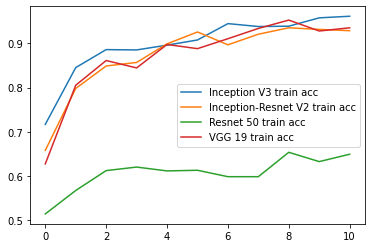

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(a.history['accuracy'], label='Inception V3 train acc')
plt.plot(b.history['accuracy'], label='Inception-Resnet V2 train acc')
plt.plot(c.history['accuracy'], label='Resnet 50 train acc')
plt.plot(d.history['accuracy'], label='VGG 19 train acc')
plt.legend()
plt.show()
plt.savefig('train_acc')

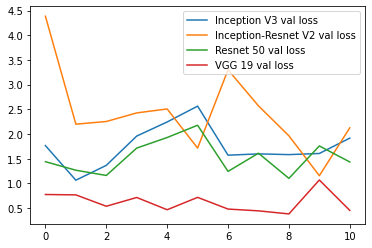

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(a.history['val_loss'], label='Inception V3 val loss')
plt.plot(b.history['val_loss'], label='Inception-Resnet V2 val loss')
plt.plot(c.history['val_loss'], label='Resnet 50 val loss')
plt.plot(d.history['val_loss'], label='VGG 19 val loss')
plt.legend()
plt.show()
plt.savefig('val_loss')

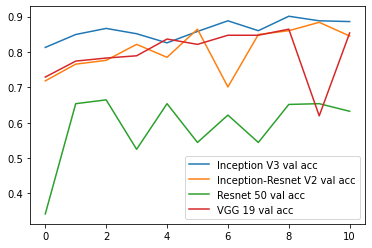

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(a.history['val_accuracy'], label='Inception V3 val acc')
plt.plot(b.history['val_accuracy'], label='Inception-Resnet V2 val acc')
plt.plot(c.history['val_accuracy'], label='Resnet 50 val acc')
plt.plot(d.history['val_accuracy'], label='VGG 19 val acc')
plt.legend()
plt.show()
plt.savefig('val_acc')

In [32]:
from tensorflow.keras.models import load_model

model1.save('model1_inception.h5')

y_pred = model1.predict(test_set)
y_pred

array([[1.6325071e-21, 1.8209293e-21, 1.0000000e+00, 1.1626024e-31,
        2.5203534e-25],
       [2.0531738e-38, 3.7381061e-18, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 3.9407223e-16, 7.7630705e-14, 1.3285845e-24,
        2.2353557e-17],
       ...,
       [1.7732389e-14, 5.0409378e-22, 0.0000000e+00, 8.5012928e-27,
        1.0000000e+00],
       [0.0000000e+00, 2.6695833e-22, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 3.3858887e-29, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)